## Objective
### Build a machine learning model to precict Biological activity (pIC50) against BRD4.

## Data: 
### Compounds with known biological activity against BRD4. 

## Assay: 
### Fluorescence Polarization 

## Endpoint: 
### pIC50 

## Variables: 
### PhysicochemicalDescriptors

## Method: 
### Linear Multivariate Regression

#### Data information: http://www.ippidb.cdithem.fr

In [1]:
#Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
Data = pd.read_csv("data/Bromodomain_Histone.csv")

In [3]:
Data.head()

,Compound's ID,CanonicalSmile,Target's bound names,Target's bound's uniprot,Test name,Activity type,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
0,1603,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-...,BRD4,O60885,Fluorescence Polarization,pIC50,6.2,423.15,1.76,1,7,81.40,5,3,0.27,1,0.28,4.44
1,1604,COc1cc2c3n([C@H](C)c4ccccn4)c(=O)[nH]c3cnc2cc1...,BRD4,O60885,Fluorescence Polarization,pIC50,6.1,415.16,2.69,1,8,93.38,3,5,0.22,1,0.27,3.41
2,1605,CC(=O)c1cc(-c2ccccn2)c2ccccn12,BRD4,O60885,Fluorescence Polarization,pIC50,5.0,236.09,1.90,0,3,34.37,2,3,0.07,0,0.38,3.10
3,1606,Cc1noc(C)c1-c1ccc(C)c(c1)S(=O)(=O)NC1CC1,BRD4,O60885,Fluorescence Polarization,pIC50,5.7,306.10,2.12,1,5,72.20,3,2,0.40,0,0.37,3.58
4,1607,COc1ccc(cc1S(=O)(=O)NC1CC1)-c1c(C)noc1C,BRD4,O60885,Fluorescence Polarization,pIC50,5.5,322.10,1.45,1,6,81.43,4,2,0.40,0,0.34,4.05


In [4]:
Data["Test name"].unique()

array(['Fluorescence Polarization'], dtype=object)

In [5]:
Data["Activity type"].unique()

array(['pIC50'], dtype=object)

### Exploratory Data Analysis

In [6]:
#Statistical descriptin of numerical data
Data.describe()

,Compound's ID,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1623.550000,5.245000,355.043500,2.463250,0.925000,5.825000,77.933250,3.850000,2.500000,0.335250,0.075000,0.297250,2.781750
std,12.957425,0.431426,43.940138,0.902539,0.525625,1.009887,10.338658,1.291987,0.640513,0.140256,0.266747,0.042061,0.942925
min,1603.000000,4.500000,236.090000,0.680000,0.000000,3.000000,34.370000,2.000000,2.000000,0.070000,0.000000,0.230000,0.980000
25%,1612.750000,4.900000,331.632500,1.650000,1.000000,5.000000,72.200000,3.000000,2.000000,0.210000,0.000000,0.260000,2.115000
50%,1623.500000,5.200000,354.115000,2.495000,1.000000,6.000000,77.020000,3.500000,2.000000,0.360000,0.000000,0.290000,2.975000
75%,1633.250000,5.525000,376.060000,3.160000,1.000000,6.000000,81.540000,5.000000,3.000000,0.440000,0.000000,0.330000,3.452500
max,1647.000000,6.200000,463.210000,4.120000,2.000000,8.000000,96.700000,8.000000,5.000000,0.610000,1.000000,0.380000,4.440000


In [7]:
#column names
Data.columns

Index(['Compound's ID', 'CanonicalSmile', 'Target's bound names',
       'Target's bound's uniprot', 'Test name', 'Activity type', 'Activity',
       'Molecular weight', 'ALogP', 'Number of H-bond donor',
       'Number of H-bond acceptor', 'Topological surface area',
       'Number of rotatable bond', 'Number of aromatic ring',
       'Number of Carbon sp3 / Number of Carbon', 'Number of chiral centers',
       'Ligand efficiency', 'Lipophilic efficiency'],
      dtype='object')

In [8]:
#Numerical types
Data.dtypes

Compound's ID                                int64
CanonicalSmile                              object
Target's bound names                        object
Target's bound's uniprot                    object
Test name                                   object
Activity type                               object
Activity                                   float64
Molecular weight                           float64
ALogP                                      float64
Number of H-bond donor                       int64
Number of H-bond acceptor                    int64
Topological surface area                   float64
Number of rotatable bond                     int64
Number of aromatic ring                      int64
Number of Carbon sp3 / Number of Carbon    float64
Number of chiral centers                     int64
Ligand efficiency                          float64
Lipophilic efficiency                      float64
dtype: object

In [9]:
#Select numerical descriptors
Data.select_dtypes(include=['float64', 'int64']).head()

,Compound's ID,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
0,1603,6.2,423.15,1.76,1,7,81.40,5,3,0.27,1,0.28,4.44
1,1604,6.1,415.16,2.69,1,8,93.38,3,5,0.22,1,0.27,3.41
2,1605,5.0,236.09,1.90,0,3,34.37,2,3,0.07,0,0.38,3.10
3,1606,5.7,306.10,2.12,1,5,72.20,3,2,0.40,0,0.37,3.58
4,1607,5.5,322.10,1.45,1,6,81.43,4,2,0.40,0,0.34,4.05


In [10]:
#Crear un DataFrame datos numericos (df_feat)
numerical_data  = Data.select_dtypes(include=['float64', 'int64'])
numerical_data.head(5)

,Compound's ID,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
0,1603,6.2,423.15,1.76,1,7,81.40,5,3,0.27,1,0.28,4.44
1,1604,6.1,415.16,2.69,1,8,93.38,3,5,0.22,1,0.27,3.41
2,1605,5.0,236.09,1.90,0,3,34.37,2,3,0.07,0,0.38,3.10
3,1606,5.7,306.10,2.12,1,5,72.20,3,2,0.40,0,0.37,3.58
4,1607,5.5,322.10,1.45,1,6,81.43,4,2,0.40,0,0.34,4.05


In [11]:
#drop some variables, 
numerical_data = numerical_data.drop(["Compound's ID"], axis =1)
numerical_data.head()

,Activity,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
0,6.2,423.15,1.76,1,7,81.40,5,3,0.27,1,0.28,4.44
1,6.1,415.16,2.69,1,8,93.38,3,5,0.22,1,0.27,3.41
2,5.0,236.09,1.90,0,3,34.37,2,3,0.07,0,0.38,3.10
3,5.7,306.10,2.12,1,5,72.20,3,2,0.40,0,0.37,3.58
4,5.5,322.10,1.45,1,6,81.43,4,2,0.40,0,0.34,4.05


In [12]:
numerical_data.columns

Index(['Activity', 'Molecular weight', 'ALogP', 'Number of H-bond donor',
       'Number of H-bond acceptor', 'Topological surface area',
       'Number of rotatable bond', 'Number of aromatic ring',
       'Number of Carbon sp3 / Number of Carbon', 'Number of chiral centers',
       'Ligand efficiency', 'Lipophilic efficiency'],
      dtype='object')

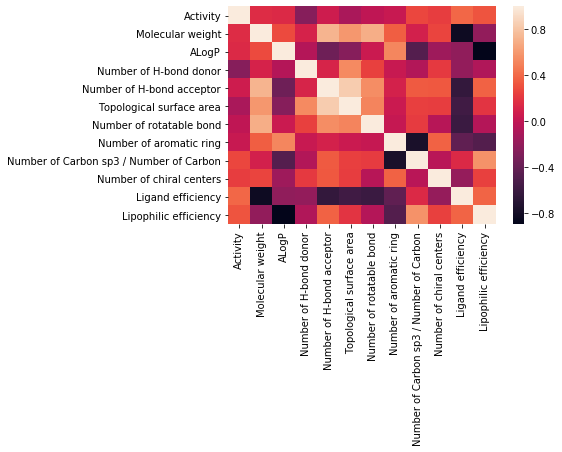

In [13]:
#Correlation matrix
sns.heatmap(numerical_data.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe88e7d5da0>,
      dtype=object)

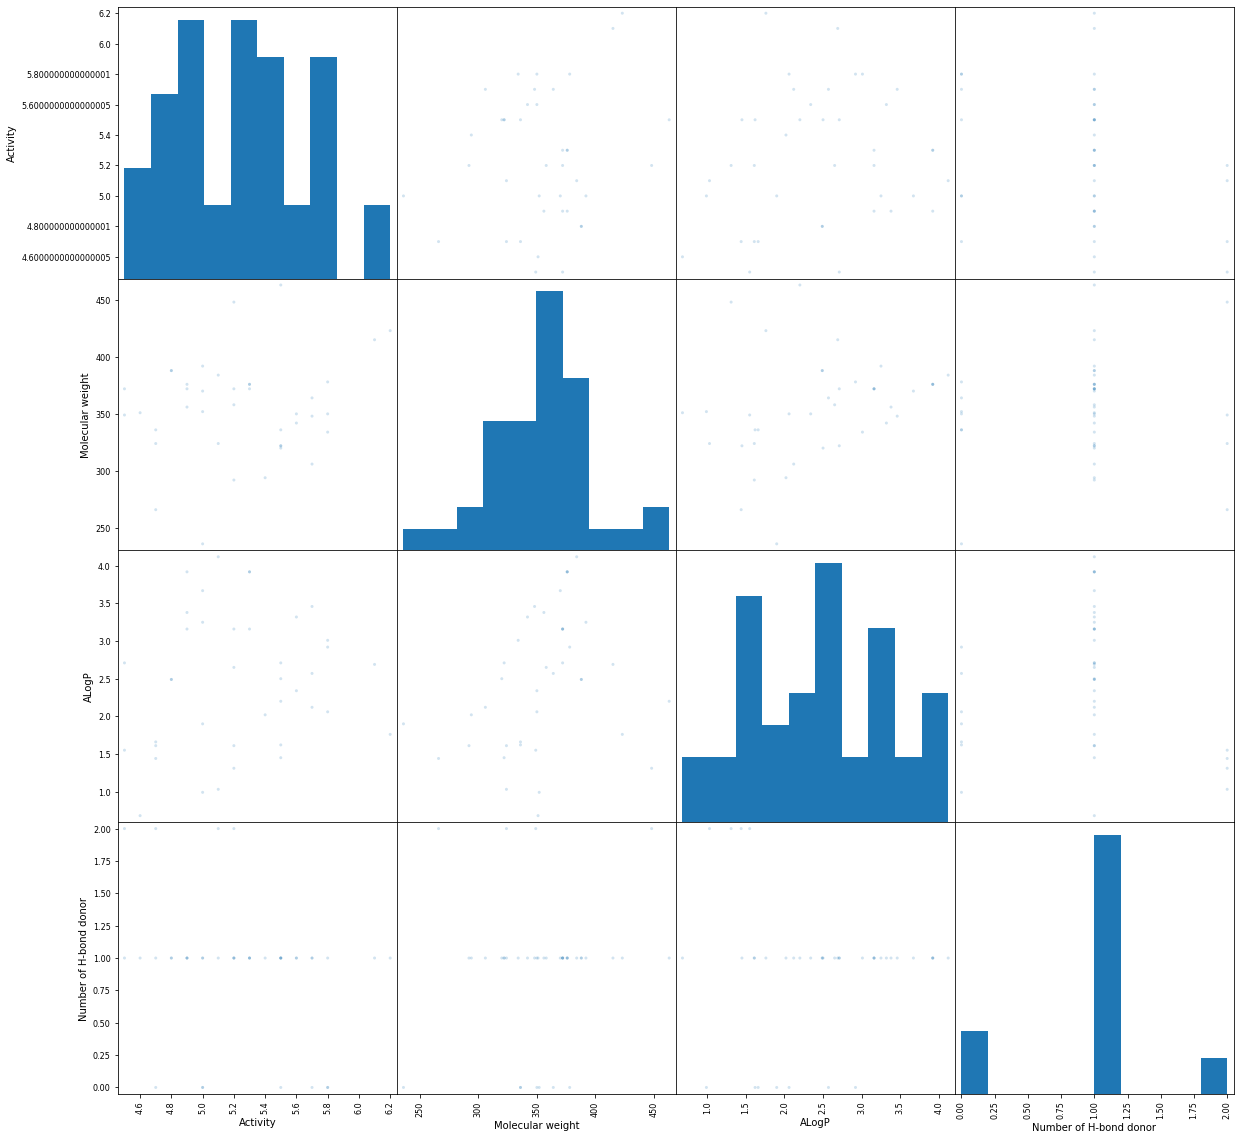

In [14]:
#scatter matrix
from pandas.plotting import scatter_matrix
features=["Activity", 'Molecular weight', 'ALogP', 'Number of H-bond donor']
_ = numerical_data[features] 
pd.plotting.scatter_matrix(_, figsize=(20,20), alpha=0.2)

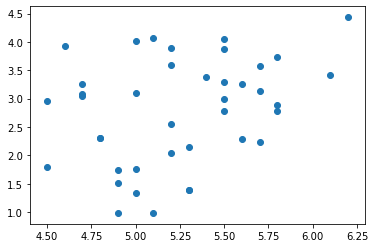

In [15]:
#Plot activity, vs Lipophilic
plt.scatter(Data["Activity"], Data["Lipophilic efficiency"])

In [16]:
#Create a dataframe to storage Target values
df_target = pd.DataFrame(Data["Activity"], columns=["Activity"])
df_target.head(5)

,Activity
0,6.2
1,6.1
2,5.0
3,5.7
4,5.5


In [17]:
#drop activity from numetical data
numerical_data = numerical_data.drop(["Activity"], axis =1)
numerical_data.head()

,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
0,423.15,1.76,1,7,81.40,5,3,0.27,1,0.28,4.44
1,415.16,2.69,1,8,93.38,3,5,0.22,1,0.27,3.41
2,236.09,1.90,0,3,34.37,2,3,0.07,0,0.38,3.10
3,306.10,2.12,1,5,72.20,3,2,0.40,0,0.37,3.58
4,322.10,1.45,1,6,81.43,4,2,0.40,0,0.34,4.05


## Machine Learning Model

### Linear multivariate regression

#### scikit-learn API
##### https://scikit-learn.org/stable/

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
#Create a test set
X_train, X_test, y_train, y_test = train_test_split(numerical_data,df_target, test_size = 0.3, random_state=42)

In [20]:
X_train.head()

,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
13,376.06,3.92,1,5,72.20,3,3,0.17,0,0.27,0.98
31,350.13,2.06,0,6,72.64,3,2,0.47,0,0.33,3.74
34,336.11,1.66,0,6,72.64,2,2,0.44,0,0.28,3.04
8,342.10,3.32,1,5,72.20,3,3,0.17,0,0.32,2.28
17,388.11,2.49,1,7,90.66,5,3,0.21,0,0.24,2.31


In [21]:
y_train.head()

,Activity
13,4.9
31,5.8
34,4.7
8,5.6
17,4.8


In [22]:
#Import model
from sklearn.linear_model import LinearRegression

In [23]:
#Assign Model
lm = LinearRegression()

In [24]:
#Train model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(lm.intercept_)

[-9.76996262e-15]


In [26]:
lm.coef_

array([[ 1.49253275e-17,  1.00000000e+00, -3.11352402e-15,
        -1.71620657e-15,  2.79962186e-16, -4.10818109e-16,
        -1.07116926e-16, -1.24683584e-16,  8.36367386e-17,
         1.82560935e-14,  1.00000000e+00]])

In [27]:
cdf = pd.DataFrame(data = lm.coef_[0],
                   index = X_train.columns,
                   columns=["Coeficiente corelación"])

In [28]:
cdf

,Coeficiente corelación
Molecular weight,1.492533e-17
ALogP,1.000000e+00
Number of H-bond donor,-3.113524e-15
Number of H-bond acceptor,-1.716207e-15
Topological surface area,2.799622e-16
Number of rotatable bond,-4.108181e-16
Number of aromatic ring,-1.071169e-16
Number of Carbon sp3 / Number of Carbon,-1.246836e-16
Number of chiral centers,8.363674e-17
Ligand efficiency,1.825609e-14


### Predictions

In [29]:
#write a function to select descriptors from an specific compoud descriptor

In [30]:
def test_compound(ID):
    test = Data[Data["Compound's ID"]== ID]
    test = test[numerical_data.columns]
    return test

In [31]:
#Look for an specific compound
test = test_compound(1603)
test

,Molecular weight,ALogP,Number of H-bond donor,Number of H-bond acceptor,Topological surface area,Number of rotatable bond,Number of aromatic ring,Number of Carbon sp3 / Number of Carbon,Number of chiral centers,Ligand efficiency,Lipophilic efficiency
0,423.15,1.76,1,7,81.4,5,3,0.27,1,0.28,4.44


#### single prediction

In [32]:
#predic
lm.predict(test)

array([[6.2]])

In [33]:
#Figure out real activity
#write a function to select an specific compound
def test_compound_Activity(ID):
    test = Data[Data["Compound's ID"]== ID]
    Activity = test["Activity"]
    return Activity

In [34]:
activity = test_compound_Activity(1603)
activity

0    6.2
Name: Activity, dtype: float64

In [35]:
def report(ID, test, activity):
    print("Evaluation of compund ID", str(ID))
    print("Predicted activity value: ", str(lm.predict(test)[0][0]))
    print("Real activity value", str(activity))

In [36]:
report(1603, test, activity)

Evaluation of compund ID 1603
Predicted activity value:  6.199999999999998
Real activity value 0    6.2
Name: Activity, dtype: float64


In [37]:
#Predictions to compute metrics
predictions = lm.predict(X_test)

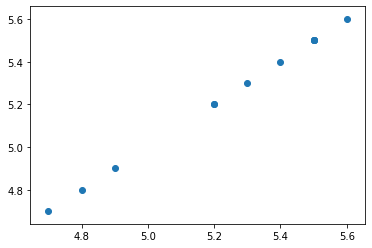

In [38]:

plt.scatter(y_test, predictions)

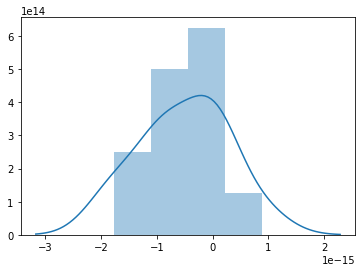

In [39]:
#residual plot
sns.distplot((y_test-predictions))

### Evaluate model
#### Note: Regression Metrics
#### scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [41]:
#Compute R2
print("R^2:",r2_score(y_test, predictions))

R^2: 1.0


In [42]:
#Compute metrics
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.661338147750939e-16
MSE: 8.545993139894294e-31
RMSE: 9.244454088746557e-16
